Reading data:

In [3]:
import pandas as pd

# path to the csv file
file_path = 'training_and_validation_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)


Printing all features' names: (24 features total)

In [4]:
# Print the features' names (24 featires in total)
for i, col_name in enumerate(df.columns):
    print(f"Column {i}: {col_name}")

Column 0: Number of analysed fibres
Column 1: Fibre content, millions/g of pulp
Column 2: Fiber_Length_Below_556
Column 3: Fiber_Length_Above_556
Column 4: [1000->]
Column 5: Mean fibre arithmetic length, µm
Column 6: Mean length-weighted fibre length, µm
Column 7: Fiber_width_Below_19
Column 8: Fiber_width_Above_19
Column 9: Mean fibre width, µm
Column 10: Mean fibre coarseness, mg/m
Column 11: Average kink number
Column 12: Average kink angle, °
Column 13: Kinked fibre content, %
Column 14: Mean fibre curl index, %
Column 15: MacroFibrillation index, %
Column 16: Broken fibre content, %
Column 17: Number of analysed fines
Column 18: Fines content, millions/g of pulp
Column 19: Fine content, % in area
Column 20: Fine content, % in length
Column 21: Fine content, % in length weighted in length
Column 22: Mean fine area, µm²
Column 23: Mean fine length, µm


Normalizing all data values based on Min/Max feature scaling: 



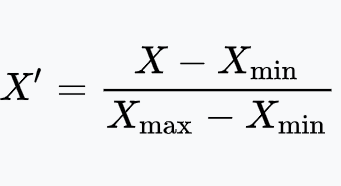

In [5]:
# loop over the features to normalize data
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)


Tuning alpha based on the minimum RMSE observed in the training and validation datasets:

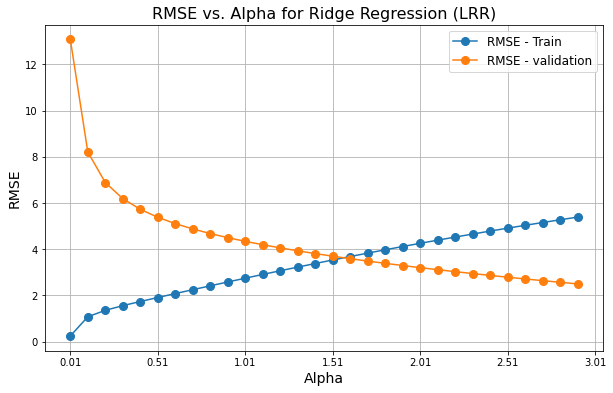

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd


# Defining the input variables as a dataframe df and y the output varibale (Tensile strength)
X_df = df
y = np.array([70.85, 96.69, 103.919, 110.48, 120.5, 106.5, 100.48]) 


# specify the indices of the training and testing data (random)
train_indices = [0, 2, 3, 4, 6]
validation_indices = [1, 5]

# Select the rows for training and testing 
X_train = X_df.iloc[train_indices]
X_validation = X_df.iloc[validation_indices]
y_train = y[train_indices]
y_validation = y[validation_indices]

# Vary alpha from 0.01 (small value) to 3 with 0.1 increments
alphas = np.arange(0.01, 3, 0.1)
rmse_train = []
rmse_validation = []

for alpha in alphas:
    # Initialize and train the Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predict on train and test set
    y_pred_train = ridge_model.predict(X_train)
    y_pred_validation = ridge_model.predict(X_validation)

    # Calculate RMSE
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_validation.append(np.sqrt(mean_squared_error(y_validation, y_pred_validation)))

# Plot final results to find the best alpha value
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmse_train, label='RMSE - Train', marker='o', markersize=8)
plt.plot(alphas, rmse_validation, label='RMSE - validation', marker='o', markersize=8)
plt.title('RMSE vs. Alpha for Ridge Regression (LRR)', fontsize=16)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(min(alphas), max(alphas)+0.1, 0.5))  # Setting x ticks to show all alphas
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Defining the input variables as a dataframe df and y the output variable (Tensile strength)
y = np.array([70.85, 96.69, 103.919, 110.48, 120.5, 106.5, 100.48])
X_df = df  

train_indices = [0, 2, 3, 4, 6]  
validation_indices = [1, 5]  

# Select the rows for training and validation based on the specified indices
X_train = X_df.iloc[train_indices]
X_validation = X_df.iloc[validation_indices]
y_train = y[train_indices]
y_validation = y[validation_indices]

# Initialize the Ridge Regression model based on the tuned alpha which is 1.5
ridge_model = Ridge(alpha=1.5, random_state=42)  

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the validation
y_pred = ridge_model.predict(X_validation)
y_pred_train = ridge_model.predict(X_train)

# Calculate the performance metrics
r2 = r2_score(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate NRMSE
y_range = np.max(y) - np.min(y)
y_range_validation = 106.5 - 96.69
nrmse = rmse / y_range_validation
nrmse_train = rmse_train / y_range

# Print performance metrics for training data
print(f'RMSE train: {rmse_train}')
print(f'NRMSE train: {nrmse_train}')  
print(f'R2 Score train: {r2_train}')

# Print performance metrics for validation data
print(f'RMSE validation: {rmse}')
print(f'NRMSE validation: {nrmse}')


RMSE train: 3.520626616017932
NRMSE train: 0.07090889458243568
R2 Score train: 0.9553382532298057
RMSE validation: 3.711376582951061
NRMSE validation: 0.3783258494343589


Import test data that was normalized based on the training and validation datasets:

In [8]:
import pandas as pd

# Path to the csv file
file_path_test = 'normalized_test_data.csv'

# Read the csv file
df_test = pd.read_csv(file_path_test)

In [9]:
ridge_model.predict(df_test)

array([ 86.20526016, 110.61325486])

Calculate the RMSE and NRMSE for test data:

In [10]:
import numpy as np

# True and predicted values test data for LRR model
true = np.array([85.5, 107])
prediction = np.array([86.20526016, 110.61325486])

# Calculate RMSE
rmse = np.sqrt(np.mean((true - prediction) ** 2))

# Calculate NRMSE (normalized by the range of each dataset)
range_true = np.max(true) - np.min(true)
nrmse = rmse / range_true

print(f"RMSE test: {rmse:.4f}")
print(f"NRMSE test: {nrmse:.4f}")


RMSE test: 2.6032
NRMSE test: 0.1211


Feature importance:

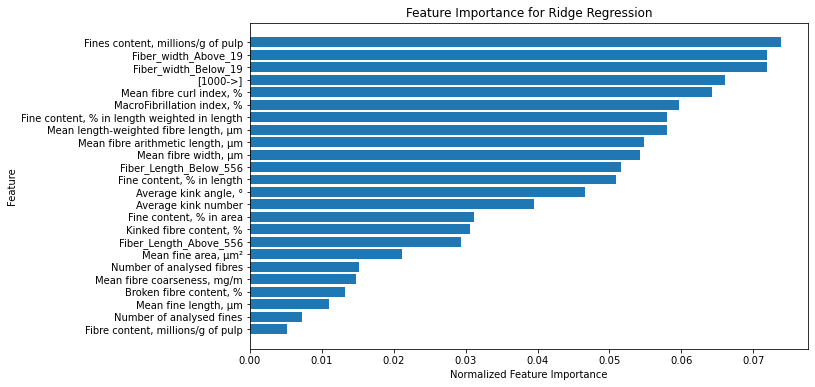

In [11]:
# Extract coefficients of features
feature_importance = np.abs(ridge_model.coef_)

# Normalize coefficients to sum up to 1
feature_importance /= np.sum(feature_importance)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), X_train.columns[sorted_indices])
plt.xlabel('Normalized Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Ridge Regression')
plt.show()

Sensetivity analysis:

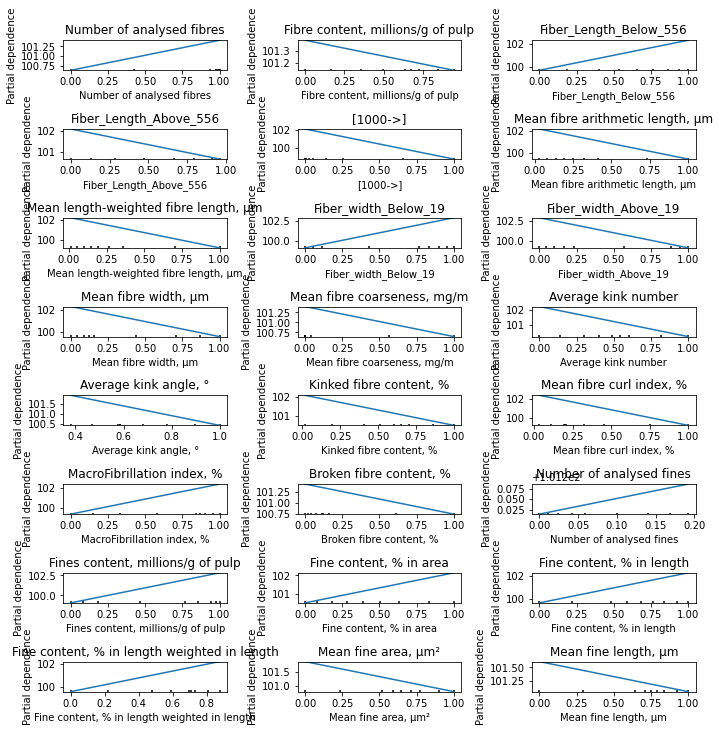

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt


# Plot Partial Dependence for all features
features = list(range(X_train.shape[1]))  # List of all feature indices
fig, axes = plt.subplots(nrows=(len(features) + 2) // 3, ncols=3, figsize=(10, 10))  
axes = axes.flatten()  

for i, feature in enumerate(features):
    if i < len(axes):
        plot_partial_dependence(ridge_model, X_train, [feature], ax=axes[i], grid_resolution=20, feature_names=X_train.columns)
        axes[i].set_title(X_train.columns[feature])

fig.tight_layout()
plt.show()


Final equation for LRR model

In [13]:
# Extracting the coefficients and intercept
intercept = ridge_model.intercept_
coefficients = ridge_model.coef_


print("The ridge model: Y = {:.2f}".format(intercept), end='')
for i, coef in enumerate(coefficients):
    print(" + {:.2f}*X{}".format(coef, i), end='')

The ridge model: Y = 101.53 + 0.77*X0 + -0.26*X1 + 2.63*X2 + -1.49*X3 + -3.37*X4 + -2.79*X5 + -2.95*X6 + 3.66*X7 + -3.66*X8 + -2.76*X9 + -0.75*X10 + -2.01*X11 + -2.37*X12 + -1.56*X13 + -3.27*X14 + 3.04*X15 + -0.67*X16 + 0.37*X17 + 3.76*X18 + 1.59*X19 + 2.60*X20 + 2.95*X21 + -1.08*X22 + -0.56*X23